In [1]:
import os

In [2]:
# If in Colab and not yet downloaded, download GitHub repository
if os.getcwd() == '/content': 
    if not os.path.exists('/content/Cascade'):
        !git clone https://github.com/HelmchenLabSoftware/Cascade
    os.chdir('Cascade')
    
# If executed as jupyter notebook on own computer, change to parent directory for imports
if os.path.basename( os.getcwd() ) == 'Demo scripts':
    %cd ..
    print('New working directory:', os.getcwd() )

# set environment variables depending on colab or jupyter environment
if os.getcwd() == '/content/Cascade':
    ENV = 'colab'
else: # assume jupyter
    ENV = 'jupyter'
    %matplotlib notebook

In [3]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np

from cascade2p import utils
import ipywidgets as widgets

## Load datasets
datasets = utils.load_all_ground_truth( ground_truth_folder='Ground_truth')
dataset_names = sorted(list( datasets.keys() ))

plt.style.use('seaborn')

print('\nSuccessfully loaded ground truth data.')


Successfully loaded ground truth data.


/tmp/ipykernel_8834/611059841.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
#@markdown Click the play button on the left to initialize the interactive exploration. Use the dropdown menu (`Dataset`) to select a dataset und use the slider (`Recording`) to switch between different continuous recordings. For some datasets, several recordings exist for the same neuron.

#@markdown Use the other two sliders to zoom into the plot (`Zoom`) and to move along the time axis (`Offset`).

#@markdown If you run this in a Jupyter notebook, you can use the magnifying glass button to draw rectangles with the left mouse button to zoom in, and the right mouse button to zoom out.

def plot_neuron(Dataset, Recording, Zoom=1, Offset=0):
    """Plot the fluorescence and spikes for a single recording of the dataset
    
    Parameters
    -------
    Dataset: str
        Name of the dataset, which is identical to the folder name in the Ground_truth folder
    Recording: int
        Number of the recording in this dataset, pooled across all files in this dataset
    """

    # correct for different plot sizes in colab and jupyter
    if ENV=='colab':   plt.figure(figsize=(20,8))
    if ENV=='jupyter': plt.figure(figsize=(8,5))
    
    
    data = datasets[Dataset][Recording]
    # plt.cla()
    plt.plot( data['t'][4:], data['dff'][4:], lw=0.5)
    
    max_dff = np.max( data['dff'][4:])
    min_dff = np.min( data['dff'][4:])
    
    plt.eventplot( data['spikes'], lineoffsets=min_dff - max_dff/20,
                  linelengths=max_dff/20, color='k', lw=1.5)
    
    # TODO: add number of APs if they are very close to each other or firing rate
    
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Fluorescence Change [Df/f]')
    plt.title('Dataset: {}   Recording: {}   Frame rate: {:.1f} Hz'.format(Dataset, Recording, data['frame_rate']))
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust zoom and offset
    if (Zoom != 1) or (Offset != 0):
        t_min = Offset
        t_max = (data['t'][-1] / Zoom) + Offset
        plt.xlim( (t_min, t_max) )
    
dataset_widget = widgets.Dropdown(options=dataset_names, value =dataset_names[9] )
recording_widget = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)

# update number of recordings depending on dataset
def update_nr_recordings(*args):
    recording_widget.max = len( datasets[dataset_widget.value] ) - 1
    
dataset_widget.observe( update_nr_recordings, 'value')
    
widgets.interact(plot_neuron, Dataset=dataset_widget,
                            Recording=recording_widget,
                            Zoom=widgets.IntSlider(min=1, max=50, step=1, value=1, continuous_update=False),
                            Offset=widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)            
                )

# update manually the first time:
update_nr_recordings()

interactive(children=(Dropdown(description='Dataset', index=9, options=('DS01-OGB1-m-V1', 'DS02-OGB1-2-m-V1', …

In [5]:
dataset_names

['DS01-OGB1-m-V1',
 'DS02-OGB1-2-m-V1',
 'DS03-Cal520-m-S1',
 'DS04-OGB1-zf-pDp',
 'DS05-Cal520-zf-pDp',
 'DS06-GCaMP6f-zf-aDp',
 'DS07-GCaMP6f-zf-dD',
 'DS08-GCaMP6f-zf-OB',
 'DS09-GCaMP6f-m-V1',
 'DS10-GCaMP6f-m-V1-neuropil-corrected',
 'DS11-GCaMP6f-m-V1-neuropil-corrected',
 'DS12-GCaMP6s-m-V1-neuropil-corrected',
 'DS13-GCaMP6s-m-V1-neuropil-corrected',
 'DS14-GCaMP6s-m-V1',
 'DS15-GCaMP6s-m-V1',
 'DS16-GCaMP6s-m-V1',
 'DS17-GCaMP5k-m-V1',
 'DS18-R-CaMP-m-CA3',
 'DS19-R-CaMP-m-S1',
 'DS20-jRCaMP1a-m-V1',
 'DS21-jGECO1a-m-V1',
 'DS22-OGB1-m-SST-V1',
 'DS23-OGB1-m-PV-V1',
 'DS24-GCaMP6f-m-PV-V1',
 'DS25-GCaMP6f-m-SST-V1',
 'DS26-GCaMP6f-m-VIP-V1',
 'DS27-GCaMP6f-m-PV-vivo-V1',
 'X-DS00-OGB1-m-S1',
 'X-DS09-GCaMP6f-m-V1',
 'X-DS10-GCaMP6f-m-V1',
 'X-DS11-GCaMP6s-m-V1',
 'X-DS12-GCaMP6s-m-V1',
 'X-NAOMi-GCaMP6f-simulated']

In [6]:
rec = 1
data = datasets['DS01-OGB1-m-V1'][rec]
dff = data['dff']
times = data['t']
spikes = data['spikes']
%matplotlib inline
#plt.figure(figsize=(20, 5))
#plt.plot(dff)
#diffs = np.diff(dff)
#plt.hist(diffs)


(array([303.,   0.,  70.,  91.,  74., 464.,   0.,   0.,   0., 161.]),
 array([0.08318084, 0.08318084, 0.08318084, 0.08318084, 0.08318084,
        0.08318084, 0.08318084, 0.08318084, 0.08318084, 0.08318084,
        0.08318084]),
 <BarContainer object of 10 artists>)

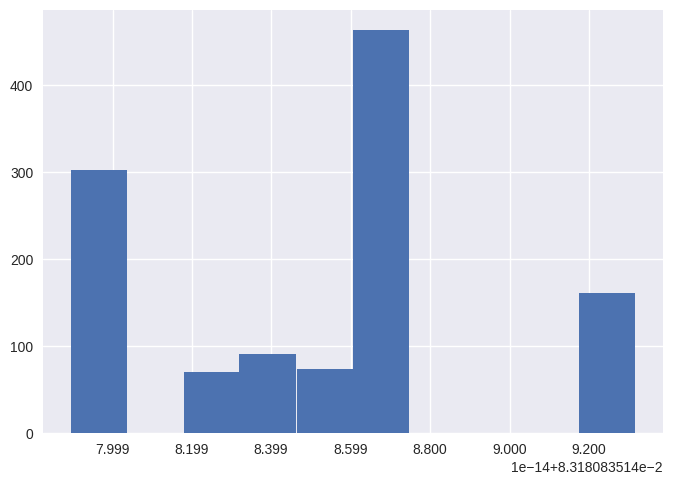

In [7]:
diffs = np.diff(times)
plt.hist(diffs)

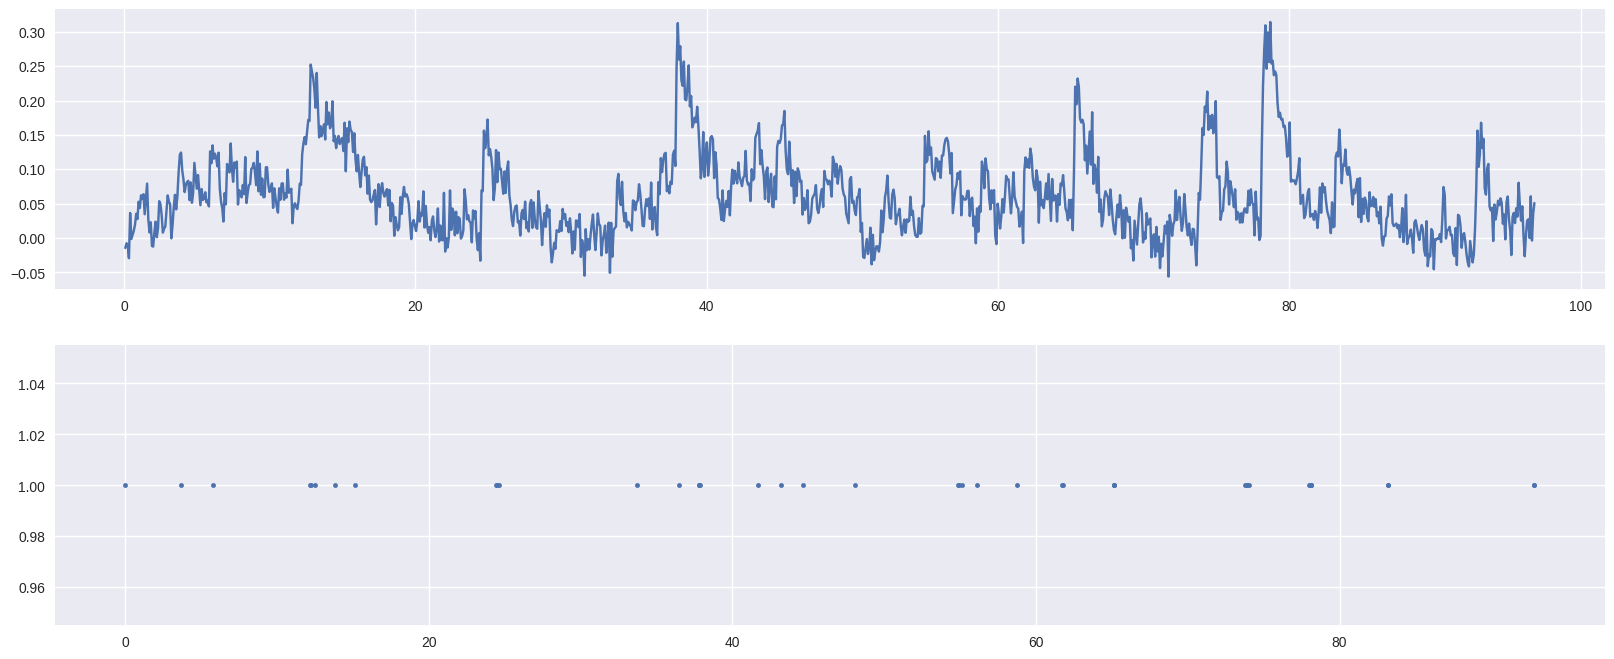

In [8]:
sp_one = np.ones(np.size(spikes))
f = plt.figure(figsize=(20,8))
ax1 , ax2 = f.subplots(2)

ax1.plot(times, dff)
ax2.plot(spikes, sp_one, '.')


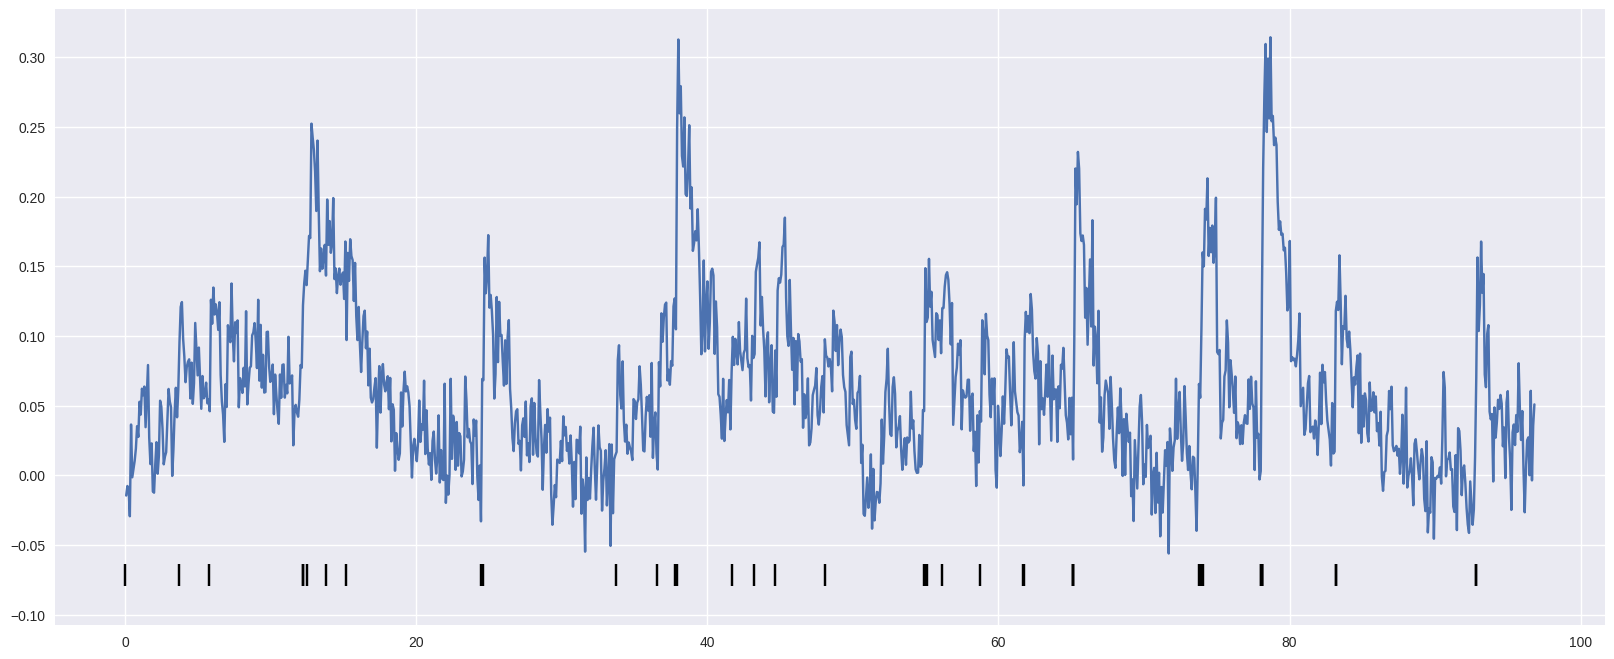

In [9]:
max_dff = np.max( dff[4:])
min_dff = np.min( dff[4:])
plt.figure(figsize=(20, 8))
plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff)

In [10]:
np.save('test_dff_1.npy', dff)
np.save('test_spikes_1.npy', spikes)

In [11]:
print(data)

{'dff': array([-0.014605 , -0.0077815, -0.0098332, ..., -0.0037402,  0.035529 ,
        0.050793 ]), 't': array([8.31808351e-02, 1.66361670e-01, 2.49542505e-01, ...,
       9.66561304e+01, 9.67393113e+01, 9.68224921e+01]), 'spikes': array([2.1000e-02, 3.6831e+00, 5.7895e+00, 1.2210e+01, 1.2237e+01,
       1.2520e+01, 1.3810e+01, 1.5168e+01, 2.4438e+01, 2.4518e+01,
       2.4622e+01, 3.3753e+01, 3.6521e+01, 3.7805e+01, 3.7833e+01,
       3.7901e+01, 4.1721e+01, 4.3201e+01, 4.4658e+01, 4.8064e+01,
       5.4872e+01, 5.4946e+01, 5.5112e+01, 5.6140e+01, 5.8732e+01,
       6.1706e+01, 6.1767e+01, 6.5137e+01, 6.5142e+01, 6.5158e+01,
       7.3762e+01, 7.3883e+01, 7.3934e+01, 7.4054e+01, 7.8018e+01,
       7.8050e+01, 7.8077e+01, 7.8102e+01, 7.8131e+01, 7.8136e+01,
       8.3159e+01, 8.3163e+01, 9.2802e+01, 9.2834e+01]), 'frame_rate': 12.022}


In [12]:
x = data['dff']
np.shape(x)

(1164,)

In [13]:
ts = data['t']
print(ts)

[8.31808351e-02 1.66361670e-01 2.49542505e-01 ... 9.66561304e+01
 9.67393113e+01 9.68224921e+01]


In [14]:
np.set_printoptions(threshold=100)

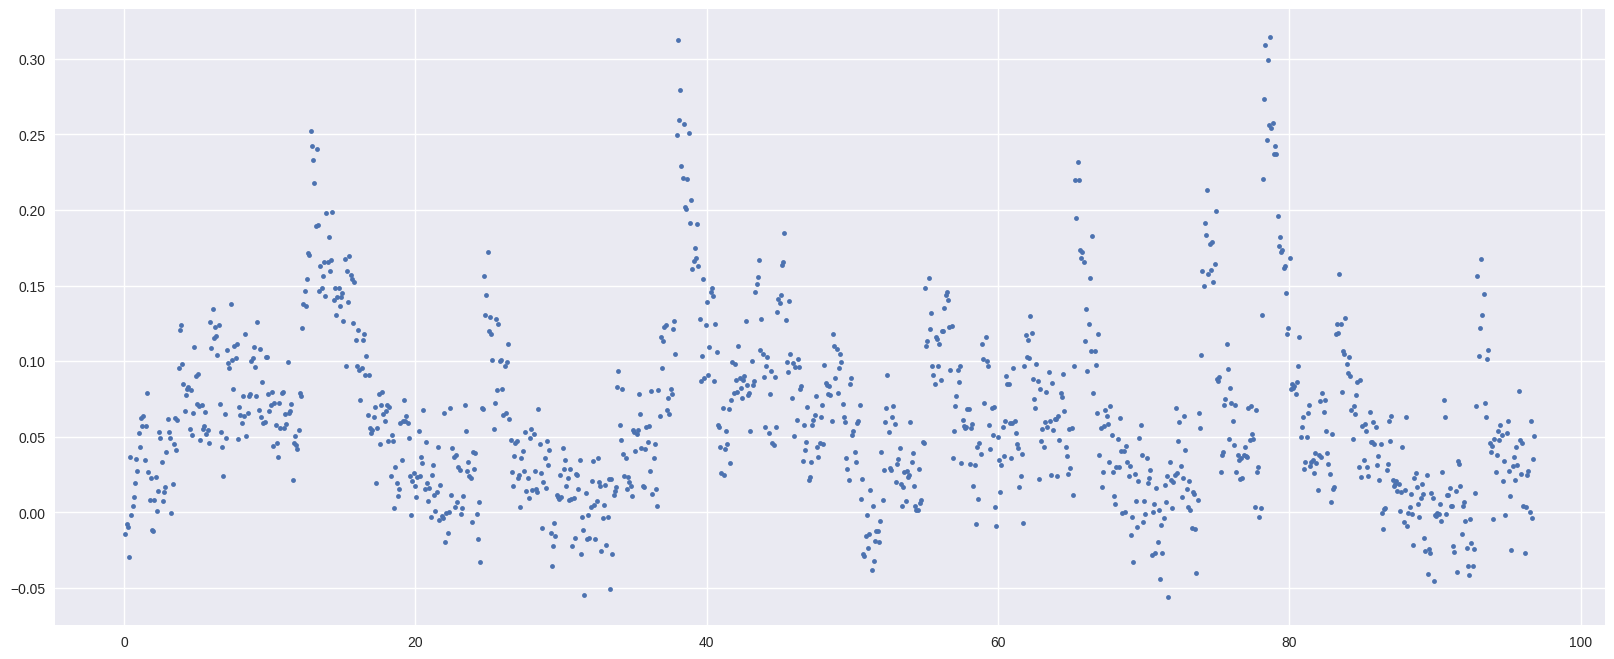

In [15]:
plt.figure(figsize=(20, 8))
#plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff, '.')

### Up-sampling

In [16]:
from scipy.interpolate import interp1d

In [17]:
intpld_signal_func = interp1d(times, dff, kind='cubic')

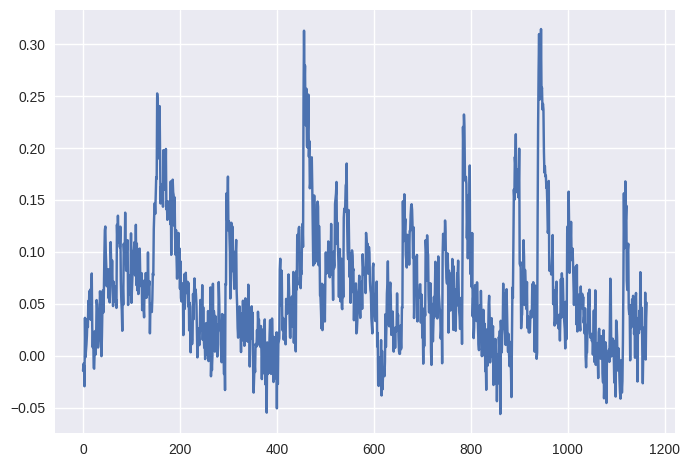

In [18]:
plt.plot(intpld_signal_func(times))

In [19]:
upsampling_rate = data['frame_rate']
evenly_spaced_time = np.linspace(times[0], times[-1], int((times[-1]-times[0])*upsampling_rate))

In [20]:
upsampled_signal = intpld_signal_func(evenly_spaced_time)

In [21]:
np.shape(upsampled_signal)

(1163,)

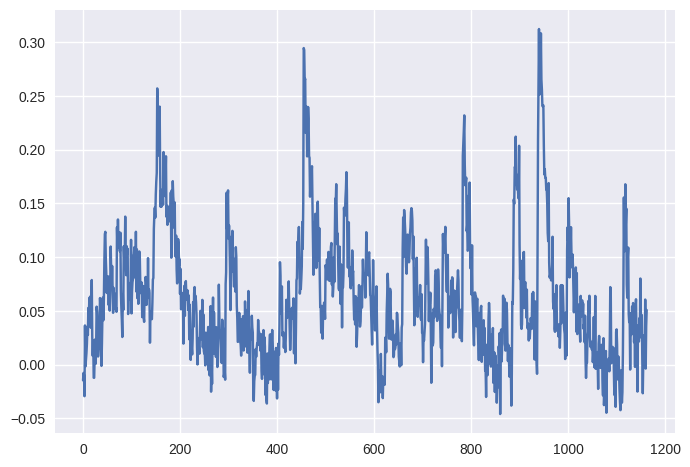

In [22]:
plt.plot(upsampled_signal)

In [23]:
evenly_spaced_time

array([8.31808351e-02, 1.66433254e-01, 2.49685674e-01, ...,
       9.66559873e+01, 9.67392397e+01, 9.68224921e+01])

In [24]:
times

array([8.31808351e-02, 1.66361670e-01, 2.49542505e-01, ...,
       9.66561304e+01, 9.67393113e+01, 9.68224921e+01])